In [1]:
from src.img_toolbox import get_letters_dataset
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pickle

# Creo el dataset con imágenes y sus etiquetas

In [2]:
letter_images_folder = "input/letter_dataset/training"

X, y = get_letters_dataset(letter_images_folder)

In [3]:
print("Numero total de features: ", len(X))
print("Numero total de labels", len(y))

Numero total de features:  39855
Numero total de labels 39855


Esta imagen:


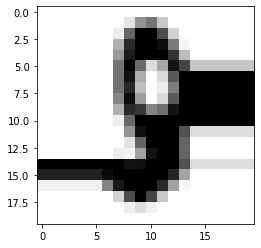

Corresponde a la letra o número:  9


In [25]:
# Por ejemplo:
print("Esta imagen:")
plt.imshow(X[220], cmap='Greys')
plt.show()

print("Corresponde a la letra o número: ", y[220])

In [5]:
# scale the raw pixel intensities to the range [0, 1] (this improves training)
X = np.array(X, dtype="float") / 255.0
y = np.array(y)


## Separar datos de Entrenamiento de datos de Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
## Hago one-hot encoding con las etiquetas (cada letra/número estará separado en una columna)
lb = LabelBinarizer().fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)


In [8]:
labels_filename = "model_labels.dat"

# Guardo los mapeos de labels para los one-hot encodings.
# Usaré este mapa para entender la predicción que haré (justo al final del notebook `03 - Usar el modelo y probar leer captchas`)
with open(labels_filename, "wb") as f:
    pickle.dump(lb, f)

# Construir la Red Neuronal

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

# Instancio el modelo
model = Sequential()

In [10]:
# Añado una Primera Capa convolucional con max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [11]:
# Añado una Segunda Capa convolucional con max pooling
model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [12]:
# Añado una capa oculta intermedia con 500 nodos
model.add(Flatten())
model.add(Dense(500, activation="relu"))

In [13]:
# Añado la última capa: la Capa de Salida con 36 nodos (uno por cada letra/número posible en nuestro set de datos)
num_of_possible_characters = 36

model.add(Dense(num_of_possible_characters, activation="softmax"))

In [14]:
# Construyo el modelo TensorFlow
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Entreno la Red Neuronal. 10 epochs. 36 posibles caracteres como batch_size.
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=num_of_possible_characters, epochs=10, verbose=1)

Epoch 1/10
886/886 [==============================] - 35s 40ms/step - loss: 1.5977 - accuracy: 0.5612 - val_loss: 1.1348 - val_accuracy: 0.6751
Epoch 2/10
886/886 [==============================] - 35s 39ms/step - loss: 1.0223 - accuracy: 0.7113 - val_loss: 1.0068 - val_accuracy: 0.7221
Epoch 3/10
886/886 [==============================] - 35s 39ms/step - loss: 0.8575 - accuracy: 0.7555 - val_loss: 0.9625 - val_accuracy: 0.7318
Epoch 4/10
886/886 [==============================] - 37s 42ms/step - loss: 0.7271 - accuracy: 0.7909 - val_loss: 0.9712 - val_accuracy: 0.7359
Epoch 5/10
886/886 [==============================] - 35s 39ms/step - loss: 0.6063 - accuracy: 0.8199 - val_loss: 0.9715 - val_accuracy: 0.7379
Epoch 6/10
886/886 [==============================] - 35s 39ms/step - loss: 0.4827 - accuracy: 0.8541 - val_loss: 1.0668 - val_accuracy: 0.7357
Epoch 7/10
886/886 [==============================] - 35s 40ms/step - loss: 0.3776 - accuracy: 0.8797 - val_loss: 1.1534 - val_accuracy:

In [16]:
# Guardo el modelo

model_file = "captcha_model.hdf5"

# Save the trained model to disk
model.save(model_file)

print("Modelo guardado...")


Modelo guardado...
